#### Dataset

In [2]:
# Petrol_Consumption.csv
# https://mitu.co.in/dataset

#### Load the libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the data

In [6]:
df = pd.read_csv('petrol_consumption.csv')

In [7]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


#### Separate the input and output variables

In [9]:
# input variables
x = df.drop('Petrol_Consumption', axis = 1)

# output variable
y = df['Petrol_Consumption']

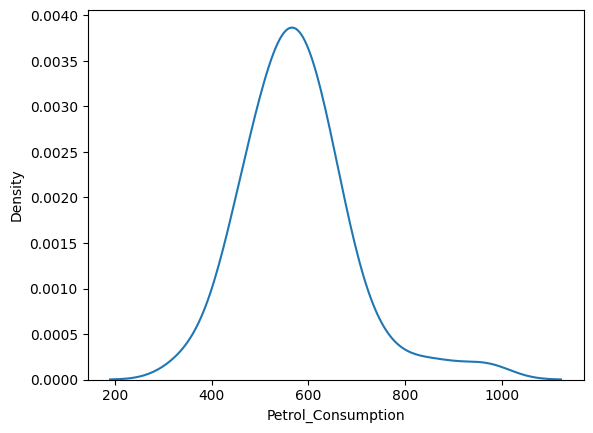

In [10]:
sns.kdeplot(y);

In [11]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

<Axes: xlabel='Population_Driver_licence(%)', ylabel='Density'>

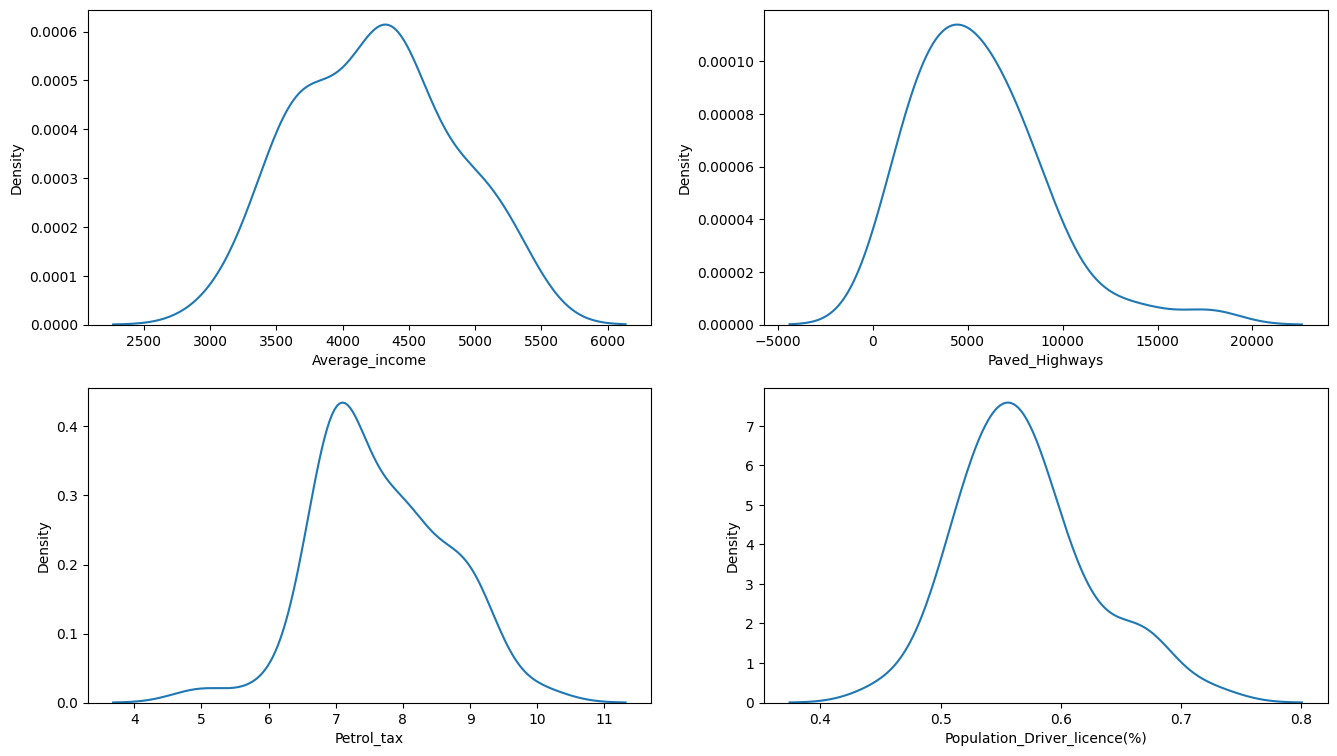

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(221)
sns.kdeplot(x['Average_income'])
plt.subplot(222)
sns.kdeplot(x['Paved_Highways'])
plt.subplot(223)
sns.kdeplot(x['Petrol_tax'])
plt.subplot(224)
sns.kdeplot(x['Population_Driver_licence(%)'])

#### Cross - Validation

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [18]:
x_train.shape

(36, 4)

In [19]:
x_test.shape

(12, 4)

#### Build the model

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
regressor = DecisionTreeRegressor(random_state=0)

In [23]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Performance Evaluation

In [27]:
# mean absolute error
y_pred = regressor.predict(x_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [30]:
mean_squared_error(y_test, y_pred)

5713.25

In [31]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

75.58604368532593

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

#### Plot tree

In [34]:
from sklearn.tree import plot_tree

In [37]:
x.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

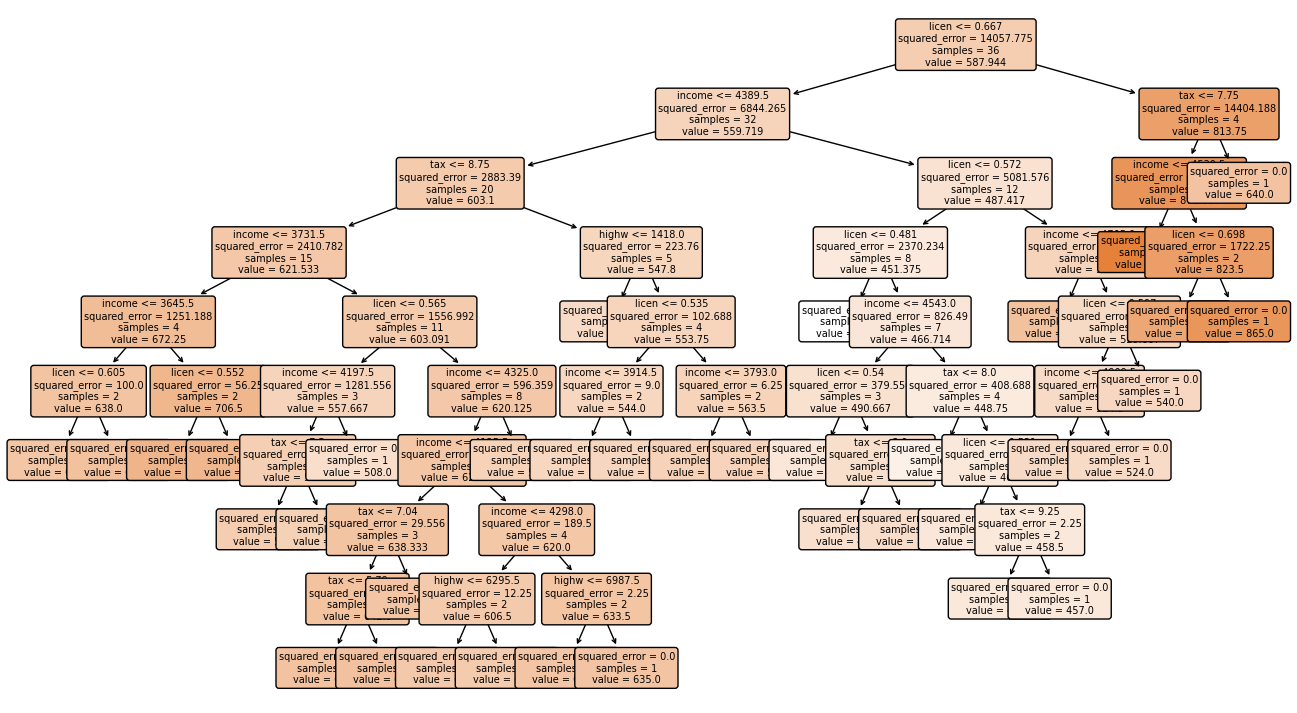

In [39]:
plt.figure(figsize=(16,9))
plot_tree(regressor, fontsize=7, filled=True, rounded=True,
         feature_names=['tax','income','highw','licen']);

In [42]:
newdf = pd.DataFrame(data=[[9.00,4300,4686,0.517],
                           [7.00,4500,4639,0.626],
                           [6.00,5200,2300,0.672]], columns=x.columns)

In [43]:
newdf

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,4300,4686,0.517
1,7.0,4500,4639,0.626
2,6.0,5200,2300,0.672


In [44]:
regressor.predict(newdf)

array([547., 649., 782.])